In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls

In [29]:
data_chemicals = pd.read_csv("datasets/chemicals.csv")
data_drought = pd.read_csv("datasets/droughts.csv")
data_education = pd.read_csv("datasets/education_attainment.csv",encoding='latin1')
data_water_usage = pd.read_csv("datasets/water_usage.csv")
data_industry_occ = pd.read_csv("datasets/industry_occupation.csv",encoding='latin1')
water_usage_dic=pd.read_csv("datasets/water_usage_dictionary.csv")

# Chemicals

In [ ]:
data_chemicals['greater_than_MCL'] = (data_chemicals['contaminant_level'] == "Greater than MCL") * 1.
groups = data_chemicals.groupby("cws_name")[['greater_than_MCL', 'fips', "pop_served"]].mean()
groups['index_with_weights'] = groups['greater_than_MCL']*groups['pop_served']
chemicals_index = groups.groupby("fips")['index_with_weights'].sum() / groups.groupby("fips")['pop_served'].sum()

In [ ]:
fips_chemicals=chemicals_index.to_dict()

In [ ]:
fips_chemicals = {int(k) : fips_chemicals[k] for k in fips_chemicals}

In [ ]:
fips = [k for k in fips_chemicals if k!=0]
chem_values = [fips_chemicals[k] for k in fips]
a=chem_values.copy()
a.sort()
quantile = a[int(.8*len(a))]
fips = [k for k in fips if fips_chemicals[k]>quantile]
chem_values = [fips_chemicals[k] for k in fips]

In [ ]:
fig = ff.create_choropleth(fips=fips, values=chem_values)
py.iplot(fig, filename='chemical index  - full usa scope')

#  Droughts

In [30]:
data_drought['valid_start'] = pd.to_datetime(data_drought['valid_start'])
data_drought['valid_end'] = pd.to_datetime(data_drought['valid_end'])
data_drought['event_duration_in_days'] = (data_drought['valid_end'] - data_drought['valid_start']).dt.days
data_drought['event_importance_with_weight'] = data_drought['event_duration_in_days'] * 0. + (data_drought['d0']*1. + data_drought['d1']*2. + data_drought['d2']*3. + data_drought['d3']*4. + data_drought['d4']*5.) / 100.
groups = data_drought.groupby("fips")
drought_index = groups['event_importance_with_weight'].sum() / groups['event_duration_in_days'].sum()

In [31]:
drought_index.head()

fips
1001    0.145533
1003    0.143284
1005    0.234105
1007    0.119415
1009    0.109820
dtype: float64

In [32]:
drought_index_dict=drought_index.to_dict()
fips_drought = list(drought_index_dict.keys())
drought_index_values = [drought_index_dict[k] for k in fips_drought]

a=drought_index_values.copy()
a.sort()
b=a[int(len(a)*.8)]

fips_drought = [k for k in fips_drought if drought_index_dict[k]>b]
drought_index_values = [drought_index_dict[k] for k in fips_drought]
fig = ff.create_choropleth(fips=fips_drought, values=drought_index_values)
py.iplot(fig, filename='drought index  - full usa scope')


In [33]:
data_industry_occ.head()

,geo_id,fips,county,total_employed,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,information,finance_insurance_realestate,prof_scientific_waste,edu_health,arts_recreation,other,public_admin,year
0,0500000US01003,1003,"Baldwin County, Alabama",77263.0,1302.0,6489.0,6134.0,2131.0,9525.0,3557.0,940.0,5893.0,9873.0,14753.0,8257.0,3575.0,4834.0,2010
1,0500000US01015,1015,"Calhoun County, Alabama",42768.0,337.0,1371.0,7868.0,750.0,5706.0,1626.0,779.0,2234.0,3776.0,8351.0,3799.0,2440.0,3731.0,2010
2,0500000US01043,1043,"Cullman County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
3,0500000US01049,1049,"DeKalb County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
4,0500000US01051,1051,"Elmore County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010


In [34]:
def agriculture_agg(industry_entry):
    return industry_entry['agriculture']

def plot_table(table,aggregator,q,title):
    table['agg']=table.apply(aggregator,axis=1) # row
    q_value = table[['agg']].quantile(q).values[0]
    table_filtered = table.loc[table['agg']>q_value]
    
    fips = table['fips']
    values = table['agg']
    print(len(fips))
    fig = ff.create_choropleth(fips=fips, values=values)
    return py.iplot(fig, filename=title)
    
plot_table(data_industry_occ,agriculture_agg,.9,title='top 10% aggriculture counties')

5705


KeyboardInterrupt: 

# overview of data industry / water usage

In [48]:
data_industry_occ.head()



# select 2010
data_industry_occ_1 = data_industry_occ.loc[data_industry_occ['year']==2010].drop(['county','year'],axis=1)
data_industry_occ_1.set_index('fips')

data_water_usage_1 = data_water_usage.set_index('fips')

joined_table = data_industry_occ_1.join(data_water_usage_1)

len(joined_table)

807

In [59]:
joined_table

,geo_id,fips,total_employed,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,information,...,thermoelectric_30,gro_wat_1,gro_wat_2,gro_wat_3,surf_wat_1,surf_wat_2,surf_wat_3,total_withdrawal_1,total_withdrawal_2,total_withdrawal_3
0,0500000US01003,1003,77263.0,1302.0,6489.0,6134.0,2131.0,9525.0,3557.0,940.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01015,1015,42768.0,337.0,1371.0,7868.0,750.0,5706.0,1626.0,779.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01043,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01049,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01051,1051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0500000US01055,1055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0500000US01069,1069,45470.0,790.0,2967.0,4237.0,1897.0,6225.0,2838.0,670.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0500000US01073,1073,289454.0,1761.0,17682.0,27091.0,8859.0,34024.0,14727.0,8309.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0500000US01077,1077,39581.0,946.0,3579.0,4285.0,1364.0,6047.0,2474.0,439.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0500000US01081,1081,63718.0,763.0,3315.0,7701.0,765.0,7232.0,1976.0,1198.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


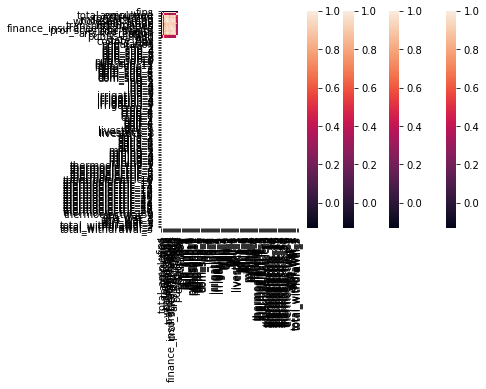

In [58]:
import seaborn as sns

joined_table

# calculate the correlation matrix
corr = joined_table.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [60]:
data_water = pd.read_csv("datasets/water_usage.csv")

In [61]:
data_water.columns.drop

Index(['state', 'state_fips', 'county', 'county_fips', 'fips', 'year',
       'population', 'pub_sup_1', 'pub_sup_2', 'pub_sup_3',
       ...
       'thermoelectric_30', 'gro_wat_1', 'gro_wat_2', 'gro_wat_3',
       'surf_wat_1', 'surf_wat_2', 'surf_wat_3', 'total_withdrawal_1',
       'total_withdrawal_2', 'total_withdrawal_3'],
      dtype='object', length=117)

In [62]:
data_water = pd.read_csv("datasets/water_usage.csv")
data_water = data_water.drop(['state','state_fips','county','county_fips','year'],axis=1)

for name in ['pub_sup','dom_sup','ind','irrigation','crop','golf','livestock','aqua','mining','thermoelectric','gro_wat','surf_wat','total']:
    cols_name = [n for n in data_water.columns if n.startswith(name)]
    cols_name.sort(key=lambda n : int(n.split('_')[-1]))
    col_kept = cols_name[-1]
    
    data_water['_'.join(col_kept.split('_')[:-1])] = data_water[col_kept]
    data_water = data_water.drop(cols_name,axis=1)
    
data_water.head()


,fips,population,pub_sup,dom_sup,ind,irrigation,crop,golf,livestock,aqua,mining,thermoelectric,gro_wat,surf_wat,total_withdrawal
0,1001,54.571,5.09,3.54,41.03,1.95,1.85,0.10,0.15,0.00,0.13,6738.26,18.38,37.17,55.55
1,1003,182.265,22.97,13.66,0.00,13.04,10.90,2.14,0.35,0.16,0.21,0.00,57.35,7.01,64.36
2,1005,27.457,4.15,2.05,1.58,3.30,3.00,0.30,0.38,2.43,0.19,0.00,6.71,4.34,11.05
3,1007,22.915,4.89,1.84,0.00,0.40,0.30,0.10,0.07,1.45,0.36,0.00,6.06,1.55,7.61
4,1009,57.322,54.61,3.87,0.00,0.97,0.56,0.41,0.98,0.00,0.12,0.00,4.04,53.04,57.08


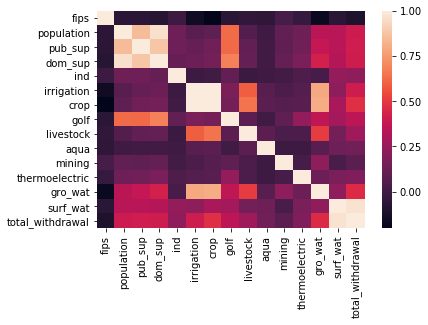

In [64]:
import seaborn as sns

# calculate the correlation matrix
corr = data_water.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()